In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tomocg as tc
import deformcg as dc
import dxchange

In [2]:
data = np.load('diff_int_projs_corr.npy')
theta = np.linspace(np.deg2rad(-85),np.deg2rad(85),data.shape[0]).astype('float32')
data = np.delete(data,-1,axis=0)[20:-20]
theta = np.delete(theta,316)[20:-20]
ntheta = data.shape[0]
nz = data.shape[1]
n = data.shape[2]

In [4]:
nz

242

In [11]:
import tomopy as tp
rot_center = tp.find_center(data, theta)
prj_algn = tp.prep.alignment.align_joint(data, theta, iters=64, upsample_factor=100, center=rot_center, algorithm='sirt')

iter=0, err=38.75695679487749
iter=1, err=4.163784336393997
iter=2, err=1.6228678319567493
iter=3, err=1.147170431975999
iter=4, err=0.891010662113535
iter=5, err=0.7373601562330311
iter=6, err=0.6278534860936905
iter=7, err=0.5732364259186605
iter=8, err=0.5026927491022722
iter=9, err=0.4655104724922952
iter=10, err=0.4323193264243457
iter=11, err=0.4064480286580315
iter=12, err=0.37509998667022104
iter=13, err=0.354400902933387
iter=14, err=0.3358571124749333
iter=15, err=0.3257299494980466
iter=16, err=0.30675723300355934
iter=17, err=0.2934280150224242
iter=18, err=0.28425340807103794
iter=19, err=0.27331300737432895
iter=20, err=0.2687005768508881
iter=21, err=0.25059928172283336
iter=22, err=0.24228082879171436
iter=23, err=0.23706539182259395
iter=24, err=0.23664319132398465
iter=25, err=0.2161018278497431
iter=26, err=0.2104756517984919
iter=27, err=0.2092844953645635
iter=28, err=0.19924858845171275
iter=29, err=0.19467922333931786
iter=30, err=0.18894443627691185
iter=31, err

<IPython.core.display.Javascript object>


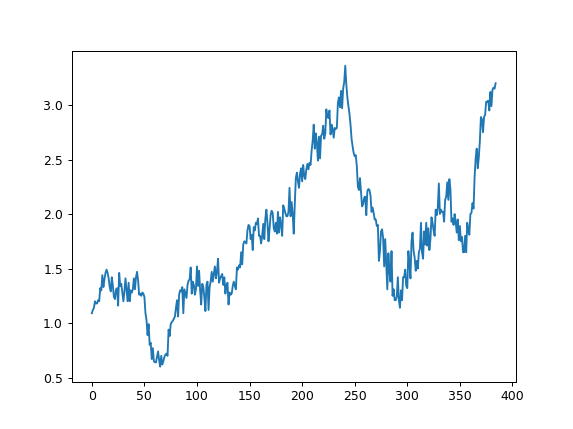

In [33]:
plt.figure()
plt.plot(prj_algn[2])

<IPython.core.display.Javascript object>


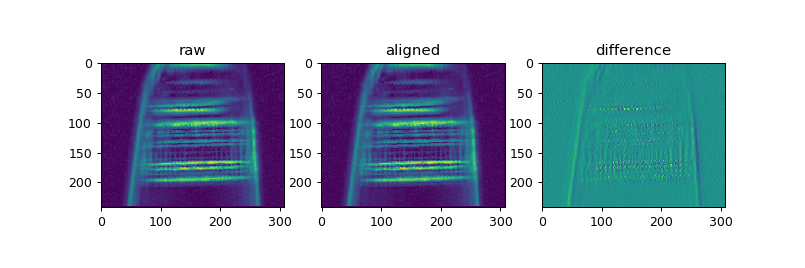

In [29]:
%matplotlib notebook
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.imshow(data[0])
plt.title('raw')
plt.subplot(132)
plt.imshow(prj_algn[0][0])
plt.title('aligned')
plt.subplot(133)
plt.imshow(prj_algn[0][0]-data[0])
plt.title('difference')
plt.show()
plt.savefig('diff_int_prj.png',dpi=300)

In [13]:
from skimage.feature import register_translation
shift = np.zeros([2,ntheta])
shift_algn = np.zeros([2,ntheta])
for i in range(1,ntheta):
    shift[:,i] = register_translation(data[i-1,:], data[i], 1000, return_error=False)
    shift_algn[:,i] = register_translation(prj_algn[0][i-1,:], prj_algn[0][i], 1000, return_error=False)

<IPython.core.display.Javascript object>


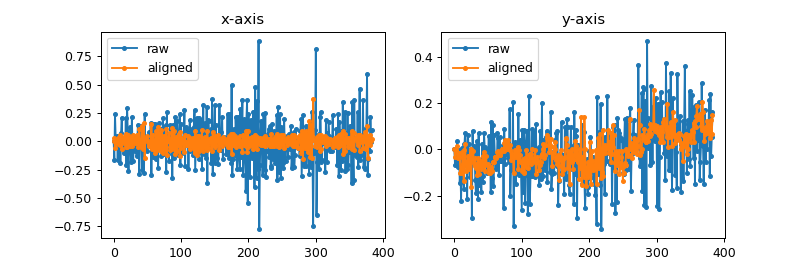

In [38]:
plt.figure(figsize=(9,3))
plt.subplot(121)
plt.plot(shift[0,:-1],'.-')
plt.plot(shift_algn[0,:-1],'.-')
plt.title('x-axis')
plt.legend(['raw','aligned'])
plt.subplot(122)
plt.plot(shift[1,:-1],'.-')
plt.plot(shift_algn[1,:-1],'.-')
plt.title('y-axis')
plt.legend(['raw','aligned'])
plt.savefig("shifts.png",dpi=300)

In [16]:
rec = tp.recon(data, theta, center=rot_center, algorithm='gridrec')
rec_algn = tp.recon(prj_algn[0], theta, center=rot_center, algorithm='gridrec')

<IPython.core.display.Javascript object>


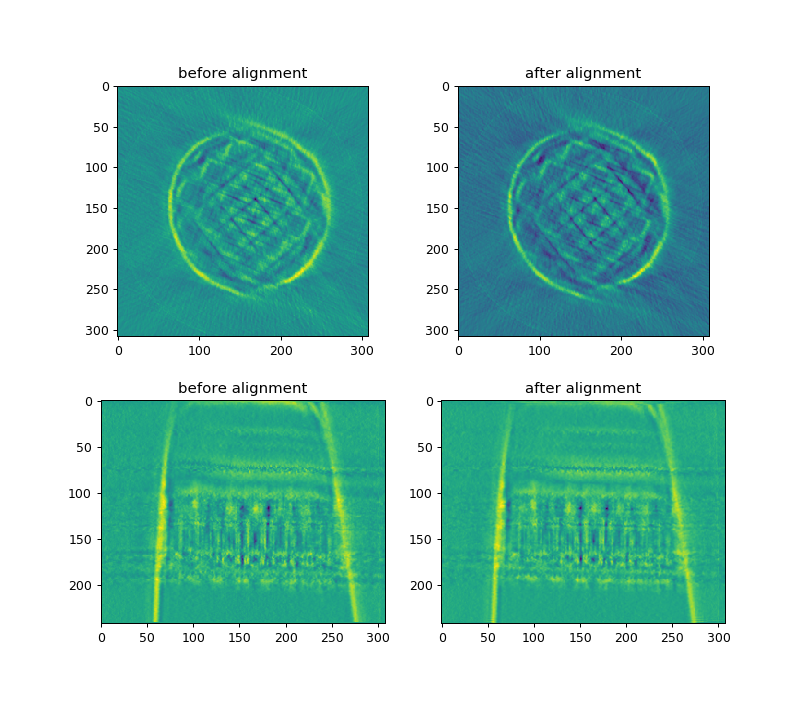

In [25]:
plt.figure(figsize = (9,8))
plt.subplot(221)
plt.imshow(rec[nz//2])
plt.title('before alignment')
plt.subplot(222)
plt.imshow(rec_algn[nz//2])
plt.title('after alignment')
plt.subplot(223)
plt.imshow(rec[:,n//2])
plt.title('before alignment')
plt.subplot(224)
plt.imshow(rec_algn[:,n//2])
plt.title('after alignment')
plt.show()
plt.savefig('diff_int_rec.png',dpi=300)

In [26]:
vmf = np.zeros((ntheta,nz))
vmf1 = np.zeros((ntheta,nz))
for i in range(ntheta):
    vmf[i] = np.sum(data[i],axis=1)
    vmf1[i] = np.sum(prj_algn[0][i],axis=1)

<IPython.core.display.Javascript object>


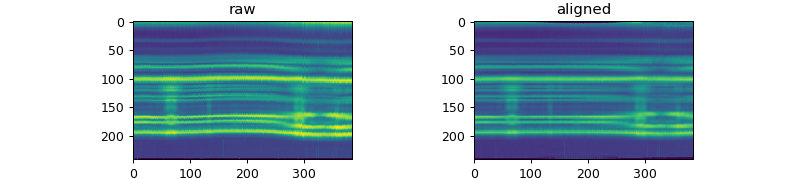

In [27]:
plt.figure(figsize=(9,2))
plt.subplot(121)
plt.imshow(vmf.T)
plt.title('raw')
# plt.plot(62.5+shift[1,:-1]*100,'r.-')
plt.subplot(122)
plt.imshow(vmf1.T)
plt.title('aligned')
# plt.plot(62.5+shift_algn[1,:-1]*100,'r.-')
plt.savefig('vmf.png',dpi=300)

In [24]:
dxchange.write_tiff_stack(rec.astype('float32'), fname=u'rec_raw/data.tiff', overwrite=True)